<a href="https://colab.research.google.com/github/CharlottePrimiceri/VP_Project/blob/main/disparity_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import torch
!pip install opencv-python
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Disparity Map 0000000008568


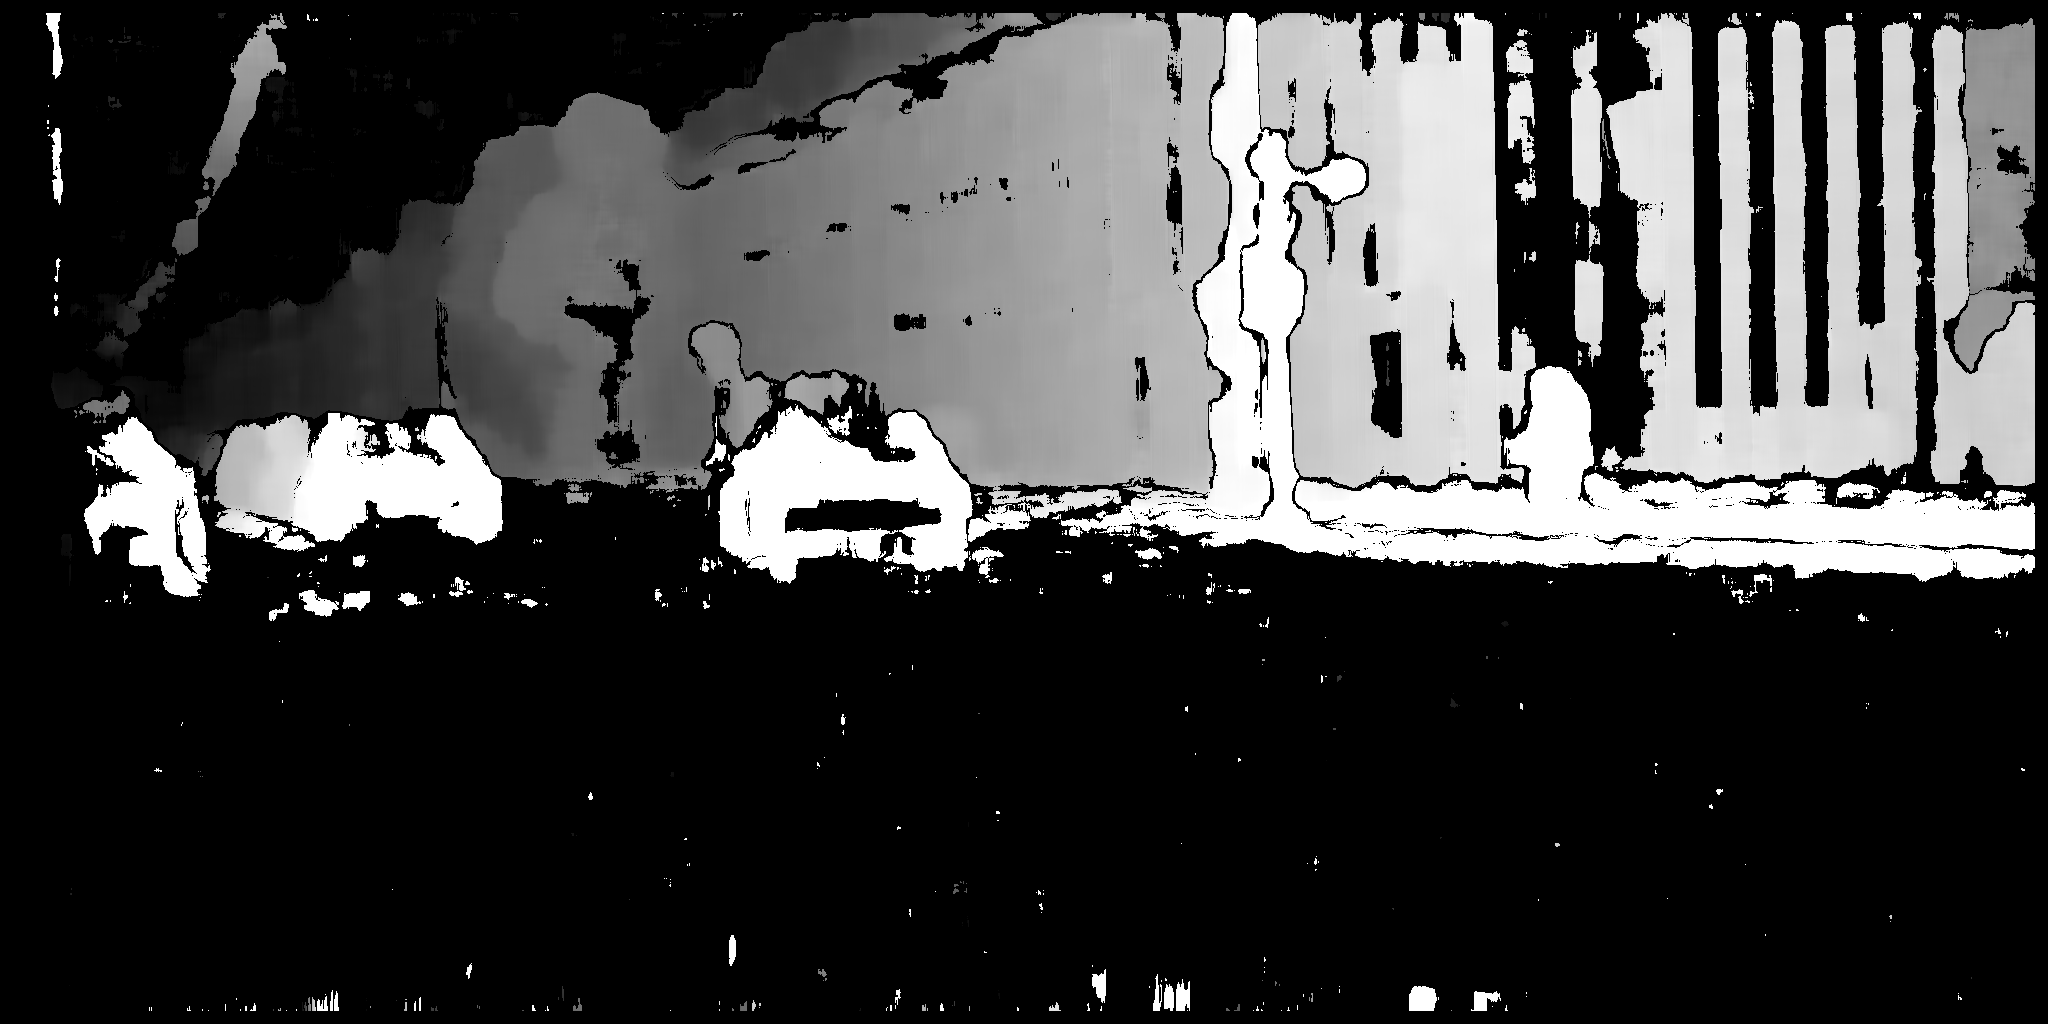

In [ ]:
left_folder = "/content/drive/MyDrive/VPPROJECT/Prova matching file/Sinistre"
right_folder = "/content/drive/MyDrive/VPPROJECT/Prova matching file/Destre"

def load_images_from_folder(folder):
  images = []
  img_numbers = []
  for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if img is not None:
      character = '\d+'
      filename_1 = re.findall(character, filename)
      img_number = ''.join(filename_1)
      img_numbers.append(img_number)
      images.append(img)
  return img_numbers, images
  # the function takes a list of images from folders, left image and right image of the same frame share the same numeric string

def image_pairing(left_path, right_path):
    left_images = load_images_from_folder(left_path)
    right_images = load_images_from_folder(right_path)
    n_samples = len(left_images[0])
    img_numbers = left_images[0]
    image_pairs = []
    for img_number in left_images[0]:
      if img_number in right_images[0]:
          i = left_images[0].index(img_number)
          image_pairs.append([left_images[1][i], right_images[1][i]])
    return img_numbers, image_pairs
    # the function pairs an image from the left image folder to the right one of the same frame, in order to compute distance map between them

def compute_disparity_map(left_folder, right_folder):
    img_numbers, image_pairs = image_pairing(left_folder, right_folder)
    disparity_maps = torch.empty((len(img_numbers),1024, 2048))
    i = 0
    for pair in image_pairs:
      left_img = pair[0]
      right_img = pair[1]
      stereo = cv2.StereoBM_create(numDisparities=32, blockSize=27)
      # "numDisparities" determines the resolution of the disparity map, the higer the value, the more accurated the depth map
      # "blockSize" specifies thge width of the search window used for block matching pixels in the rectified stereo pair image
      disparity_map = stereo.compute(left_img, right_img)
      print("Disparity Map", img_numbers[i])
      cv2_imshow(disparity_map)
      disparity_map = torch.from_numpy(disparity_map)
      disparity_maps[i] = disparity_map
      i+=1
    return disparity_map

depth = compute_disparity_map(left_folder,right_folder)